In [27]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# For modelling the data
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [28]:
# Data ingection
df = pd.read_csv('WebserverLogFiles(Maduo).csv')

# Data Preparation

In [29]:
# Dataframe check
df.head(15)

,Time of Visit,IP Address,Request_Method,Visited_Pages,Status_Code,Country,Sports,Frequency_of_Visit,Gender,Age
0,15:36:29,89.222.119.77,HEAD,images/games.html,200,Argentina,Volleyball,Once,Male,35
1,6:20:07,0.44.65.161,GET,Athletics.html,200,China,Table Tennis,Often,Male,36
2,19:49:19,102.229.109.16,POST,football.html,200,Japan,Volleyball,Seldon,Non-binary,31
3,2:22:15,186.66.122.127,GET,Aquatics.html,403,Peru,Wrestling,Daily,Female,38
4,7:24:41,102.115.244.71,CONNECT,images/games.html,301,Cameroon,Weightlifting,Seldon,Male,26
5,17:02:58,191.49.120.165,POST,Basketball.html,301,Canada,Football,Daily,Male,40
6,18:47:55,209.51.105.61,PATCH,Wrestling.html,301,Portugal,Shooting,Daily,Female,36
7,2:21:55,176.155.136.83,PUT,Badminton.html,100,Ukraine,Athletics,Often,Non-binary,22
8,18:33:25,97.195.34.180,POST,index.html,500,China,Football,Often,Female,23
9,5:29:16,21.101.219.223,GET,football.html,500,Brazil,Athletics,Daily,Male,32


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20922 entries, 0 to 20921
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Time of Visit       20922 non-null  object
 1   IP Address          20922 non-null  object
 2   Request_Method      20922 non-null  object
 3   Visited_Pages       20922 non-null  object
 4   Status_Code         20922 non-null  int64 
 5   Country             20922 non-null  object
 6   Sports              20922 non-null  object
 7   Frequency_of_Visit  20922 non-null  object
 8   Gender              20922 non-null  object
 9   Age                 20922 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 1.6+ MB


In [31]:
df.describe()

,Status_Code,Age
count,20922.000000,20922.000000
mean,213.086416,44.059794
std,82.265376,15.313455
min,100.000000,18.000000
25%,200.000000,31.000000
50%,200.000000,44.000000
75%,200.000000,57.000000
max,500.000000,70.000000


In [32]:
# Shape of the dataset
df.shape

(20922, 10)

In [34]:
# Checking of the missing values
null_counts = df.isnull().sum()
print(null_counts)

Time of Visit         0
IP Address            0
Request_Method        0
Visited_Pages         0
Status_Code           0
Country               0
Sports                0
Frequency_of_Visit    0
Gender                0
Age                   0
dtype: int64


In [35]:
# Exploratory Data Analysis

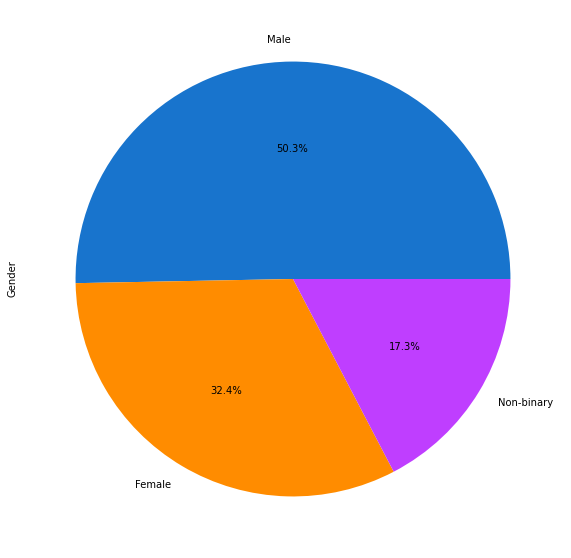

In [36]:
# Pie chart showing Gender
colors = ['#1874CD', '#FF8C00', '#BF3EFF']
Piechart= df['Gender'].value_counts(ascending=False).plot.pie(colors=colors,autopct='%1.1f%%',figsize=(10, 10))
plt.show()

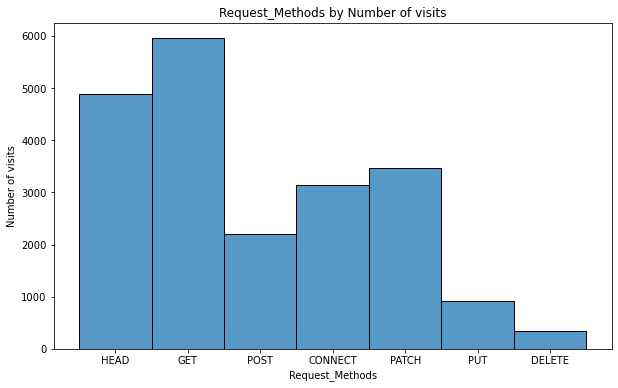

In [37]:
# Histogram showing request methods by number of visits

plt.figure(figsize=(10,6))
sns.histplot(x='Request_Method', data=df)
plt.title('Request_Methods by Number of visits')
plt.xlabel('Request_Methods')
plt.ylabel('Number of visits')
plt.show()

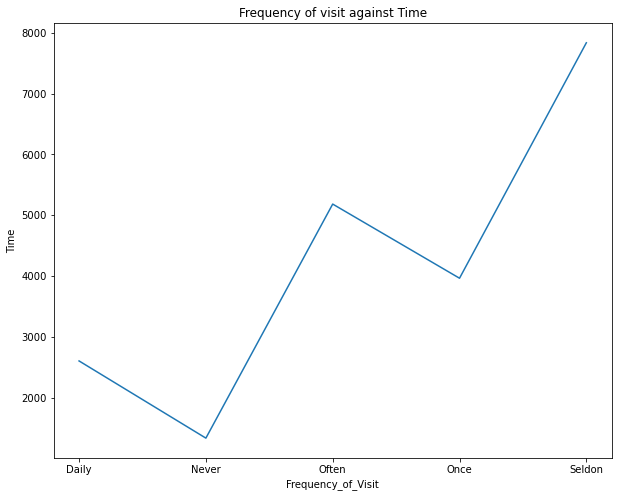

In [38]:
# Line graph showing Frequency of visit against Time 
Frequency = df.groupby('Frequency_of_Visit')['Time of Visit'].count().reset_index()
plt.figure(figsize=(10,8))
sns.lineplot(x='Frequency_of_Visit', y='Time of Visit', data=Frequency)
plt.title('Frequency of visit against Time')
plt.xlabel('Frequency_of_Visit')
plt.ylabel('Time')
plt.show()

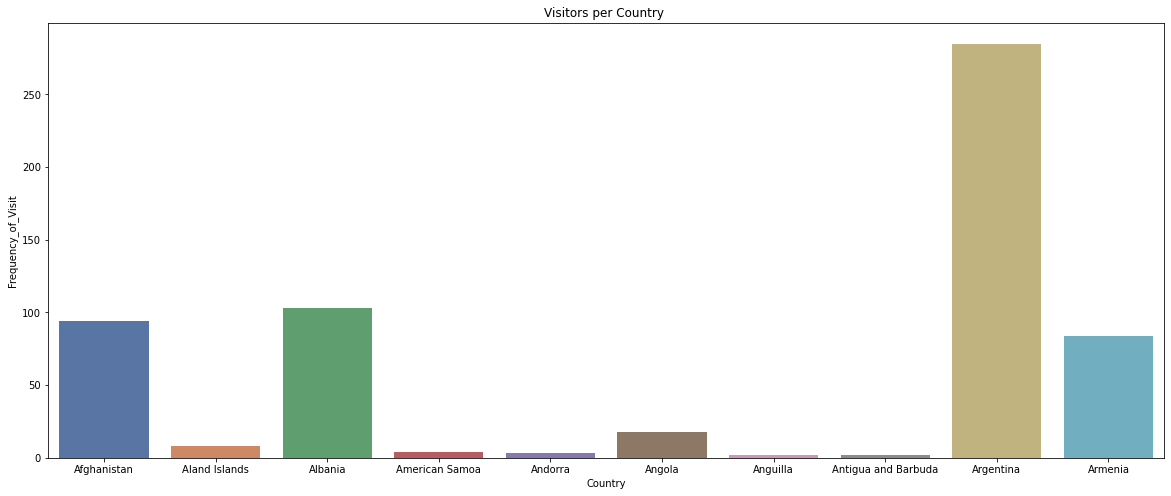

In [39]:
# bar graph showing top 10 by Frequency_of_Visit
Country_Visits = df.groupby('Country')['Frequency_of_Visit'].count().reset_index()
plt.figure(figsize=(20,8))
sns.barplot(x='Country', y='Frequency_of_Visit', data=Country_Visits[:10], palette='deep')
plt.title('Visitors per Country ')
plt.xlabel('Country')
plt.ylabel('Frequency_of_Visit')
plt.show()

# User segmentation

In [40]:
# User Segmentation by Country
country_segmentation = df.groupby('Country').size().reset_index(name='User Count')
country_segmentation = country_segmentation.sort_values(by='User Count', ascending=False)
print("User Segmentation by Country:")
print(country_segmentation)

User Segmentation by Country:
                      Country  User Count
40                      China        3956
88                  Indonesia        2199
165                    Russia        1235
156               Philippines        1071
27                     Brazil         805
..                        ...         ...
204  Turks and Caicos Islands           1
170              Saint Martin           1
202                    Turkey           1
157                  Pitcairn           1
198                   Tokelau           1

[220 rows x 2 columns]


In [41]:
# User Segmentation by Gender and Age
gender_age_segmentation = df.groupby(['Gender', 'Age']).size().reset_index(name='User Count')
gender_age_segmentation = gender_age_segmentation.sort_values(by=['User Count'], ascending=False)
print("\nUser Segmentation by Gender and Age:")
print(gender_age_segmentation)


User Segmentation by Gender and Age:
         Gender  Age  User Count
58         Male   23         232
79         Male   44         226
59         Male   24         226
92         Male   57         222
80         Male   45         220
..          ...  ...         ...
129  Non-binary   41          59
158  Non-binary   70          59
112  Non-binary   24          57
152  Non-binary   64          56
121  Non-binary   33          43

[159 rows x 3 columns]


# ClickStream Analysis

In [42]:
# Click Paths Analysis
click_paths = df.groupby('IP Address')['Visited_Pages'].apply(lambda x: ' > '.join(x)).reset_index(name='Click Path')
click_paths_count = click_paths['Click Path'].value_counts().reset_index()
click_paths_count.columns = ['Click Path', 'Frequency']
click_paths_count = click_paths_count.sort_values(by='Frequency', ascending=False)
print("Click Paths Analysis:")
print(click_paths_count)

Click Paths Analysis:
                         Click Path  Frequency
0                        index.html       2852
1                    Athletics.html       2773
2                 images/games.html       2661
3                 searchsports.html       2288
4                       Tennis.html       1891
5                     football.html       1735
6                    ticketing.html       1248
7                   Gymnastics.html       1211
8                   Basketball.html       1026
9                         news.html        870
10                   Badminton.html        563
11                    Aquatics.html        555
12                   Wrestling.html        474
13                  Volleyball.html        385
14           Baseball/Softball.html        159
15                      Boxing.html        116
16                     Fencing.html         79
17                      Karate.html         30
18  Badminton.html > Badminton.html          1
19    football.html > football.html   

# Modelling the Data with Clustering

In [43]:
# Select the features for clustering
features = ['Status_Code', 'Age']
X = df[features]

In [44]:
# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [45]:
# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)
    sse.append(kmeans.inertia_)

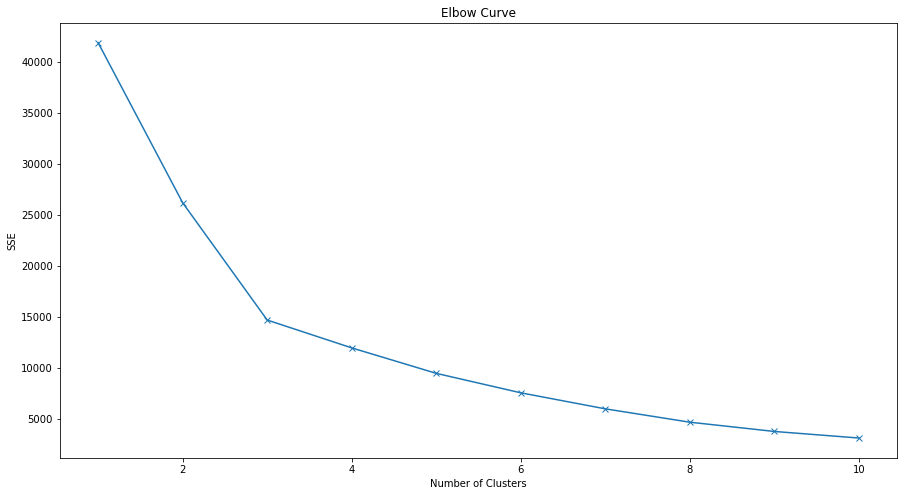

In [46]:
# Plot the elbow curve
plt.figure(figsize=(15,8))
plt.plot(range(1, 11), sse, marker='x')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve')
plt.show()

In [47]:
# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_std)

KMeans(n_clusters=3, random_state=42)

In [48]:
# Assign cluster labels to the data
cluster_labels = kmeans.labels_

In [49]:
# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

In [50]:
# Analyze the clusters
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)

0    8790
1    8615
2    3517
Name: Cluster, dtype: int64


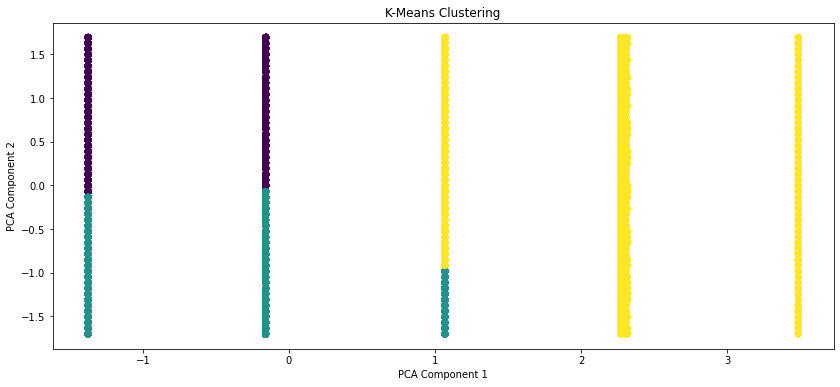

In [51]:
# Create a scatter plot of the data with different colors for each cluster
plt.figure(figsize=(14,6))
plt.scatter(X_std[:,0], X_std[:,1], c=kmeans.labels_)
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [2]:
from IPython.display import IFrame
Dashboard = IFrame(src="https://app.powerbi.com/view?r=eyJrIjoiYThiZGMxMjktMzk2Yy00MWIyLWI2MTctMmRmYjYxYTE4NDBlIiwidCI6ImVlMjkyOTc3LTdiNTgtNGRmNC04MTM4LTUwZDBkZTdkMjhkOCIsImMiOjh9", height = 700, width = 1000)
display(Dashboard)